In [64]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mostrar código."></form>''')

BOLETIM EPIDEMIOLóGICO DA MICRORREGIÃO DE ITABIRA.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#importamos o banco de dado
base_out = pd.read_csv('csv_sistemas(47).csv',sep=',', encoding='latin-1')
base_out['contador'] = 1

#segundo banco de dado com o restante dos confirmados.
base_lab = pd.read_csv('csv_laboratorios(9).csv',sep=',', encoding='latin-1')
base_lab['contador'] = 1

base = pd.concat([base_lab, base_out], ignore_index=False)

#Limpeza e oredanção dos dados
from datetime import datetime
base['DATA_NOTIFICACAO'] = pd.to_datetime(base['DATA_NOTIFICACAO'], format='%m/%d/%Y')

base.sort_values('DATA_NOTIFICACAO', inplace=True)

In [2]:
#seleciono a regiao com a qual vou trabalhar e extrair os dados.
microrregiao_itabira = base.loc[base['MICRO'] == 'ITABIRA']

In [4]:
confirmados_24h = microrregiao_itabira.loc[microrregiao_itabira['DATA_NOTIFICACAO'] == '2020-07-22']
print("Confirmados nas ultimas 24hrs: ",int(confirmados_24h.contador.sum()))

Confirmados nas ultimas 24hrs:  0


In [5]:
Casos_confirmados = microrregiao_itabira.contador.sum()
print('Casos confirmados: ', int(Casos_confirmados))

Casos confirmados:  967


In [7]:
em_acompanhamento = microrregiao_itabira.loc[microrregiao_itabira['EVOLUCAO'] == 'EM ACOMPANHAMENTO']
em_acompanhamento = em_acompanhamento['contador'].sum()
print('Casos em acompanhamento: ', 'Não Informado')

Casos em acompanhamento:  Não Informado


In [8]:
recuperados = microrregiao_itabira.loc[microrregiao_itabira['EVOLUCAO'] == 'RECUPERADO']
Casos_recuperados = recuperados['contador'].sum()
print('Casos recuperados: ', int(Casos_recuperados))

Casos recuperados:  751


In [9]:
obitos = microrregiao_itabira.loc[microrregiao_itabira['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos['contador'].sum()
print('Óbitos: ', int(obitos_OP))

Óbitos:  7


In [10]:
print('')

1_ PERFIL EPIDEMIOLOGICO DOS CONFIRMADOS:

POR SEXO:

In [11]:
#microrregiao_itabira.groupby(['SEXO']).contador.sum()

In [12]:
Homens_confirmados = microrregiao_itabira.loc[(microrregiao_itabira['SEXO'] == 'MASCULINO')]
Homens_confirmados_vivos = Homens_confirmados[(Homens_confirmados.EVOLUCAO != 'OBITO')]
Homens_confirmados_vivos = Homens_confirmados_vivos['contador'].sum()
print('Homens confirmados: ', int(Homens_confirmados_vivos))

Homens confirmados:  710


In [13]:
Mulheres_confirmadas = microrregiao_itabira.loc[(microrregiao_itabira['SEXO'] == 'FEMININO')]
Mulheres_confirmadas_vivas = Mulheres_confirmadas[(Mulheres_confirmadas.EVOLUCAO != 'OBITO')]
Mulheres_confirmadas_vivas = Mulheres_confirmadas_vivas['contador'].sum()
print('Mulheres confirmadas: ', int(Mulheres_confirmadas_vivas))

Mulheres confirmadas:  250


In [14]:
sem_informacao_sexo = microrregiao_itabira.loc[microrregiao_itabira['SEXO'] == 'NAO INFORMADO']
print('Sem informação do sexo: ', int(sem_informacao_sexo.contador.sum()))

Sem informação do sexo:  0


In [15]:
perct_por_sexo_H_vivos = Homens_confirmados_vivos/(Homens_confirmados_vivos+Mulheres_confirmadas_vivas)
print("Porcentagem homens: ","{:.0%}".format(perct_por_sexo_H_vivos));

Porcentagem homens:  74%


In [16]:
perct_por_sexo_M_vivos = Mulheres_confirmadas_vivas/(Homens_confirmados_vivos+Mulheres_confirmadas_vivas)
print("Porcentagem mulheres: ","{:.0%}".format(perct_por_sexo_M_vivos));

Porcentagem mulheres:  26%


In [17]:
N_vivo = Mulheres_confirmadas_vivas + Homens_confirmados_vivos
print("N total: ",int(N_vivo))

N total:  960


In [18]:
print('')

COMORBIDADE:

In [19]:
com_comorbidade = microrregiao_itabira.loc[(microrregiao_itabira['COMORBIDADE'] == 'SIM')]
Com_comorbidade_vivos = com_comorbidade[(com_comorbidade.EVOLUCAO != 'OBITO')]
Com_comorbidade_vivos = Com_comorbidade_vivos['contador'].sum()
print("Com comorbidade: ", int(Com_comorbidade_vivos))

Com comorbidade:  46


In [20]:
sem_comorbidade = microrregiao_itabira.loc[(microrregiao_itabira['COMORBIDADE'] == 'NAO')]
Sem_comorbidade_vivos = sem_comorbidade[(sem_comorbidade.EVOLUCAO != 'OBITO')]
Sem_comorbidade_vivos = Sem_comorbidade_vivos['contador'].sum() 
print ("Sem comorbidade: ", int(Sem_comorbidade_vivos))

Sem comorbidade:  511


In [21]:
comorbidade_nao_informada = microrregiao_itabira.loc[(microrregiao_itabira['COMORBIDADE'] == 'NAO INFORMADO')]
Comorbidade_nao_informada = comorbidade_nao_informada['contador'].sum()
print("Comorbidade não informada: ", int(Comorbidade_nao_informada))

Comorbidade não informada:  404


In [22]:
print('')

In [23]:
Media_idade_confirmados = microrregiao_itabira.loc[(microrregiao_itabira.EVOLUCAO != 'OBITO')]
Media_idade_confirmados = Media_idade_confirmados['IDADE'].mean()
print ("Média de idade entre os vivos: ", round(Media_idade_confirmados))
populacao_total = 51875+60724+74281
print("Prevalência Micro Ouro Preto:", "{:.0}".format(Casos_confirmados/populacao_total))

Média de idade entre os vivos:  39
Prevalência Micro Ouro Preto: 0.005


In [24]:
print('')

In [25]:
microrregiao_itabira['FAIXA_ETARIA'] = microrregiao_itabira['FAIXA_ETARIA'].replace(['60 A 69 ANOS', '70 A 79 ANOS', '80 A 89 ANOS', '90 OU MAIS'], '>= 60 ANOS')
microrregiao_itabira['FAIXA_ETARIA'] = microrregiao_itabira['FAIXA_ETARIA'].replace(['0'], 'Nao informado')

grafico_faixa_etaria = microrregiao_itabira.groupby(['FAIXA_ETARIA']).contador.sum()
grafico_faixa_etaria = pd.DataFrame({'Confirmados': grafico_faixa_etaria}).reset_index()
grafico_faixa_etaria = (grafico_faixa_etaria.drop([0,6]))
grafico_faixa_etaria

,FAIXA_ETARIA,Confirmados
1,10 A 19 ANOS,10
2,20 A 29 ANOS,123
3,30 A 39 ANOS,396
4,40 A 49 ANOS,257
5,50 A 59 ANOS,114
7,>= 60 ANOS,35


In [26]:
denominador_20_59 = grafico_faixa_etaria['Confirmados'].sum()
numerador_20_59 = grafico_faixa_etaria.iloc[[2,3,4,5],1].sum(axis=0)

percent_entre_20_59 = (numerador_20_59/denominador_20_59)
print("Porcentagem de confirmados entre 20 e 59 anos: ","{:.0%}".format(percent_entre_20_59));

Porcentagem de confirmados entre 20 e 59 anos:  86%


In [27]:
print('')

Por Raça:

In [30]:
raca = microrregiao_itabira.groupby(['RACA']).contador.sum()
raca = pd.DataFrame({'Quantidade': raca}).reset_index()
print('Não informado: ', int(raca.iloc[3,1]))
raca = raca.drop([2])
raca

Não informado:  281


,RACA,Quantidade
0,AMARELA,124
1,BRANCA,106
3,PARDA,281
4,PRETA,46


In [31]:
print('')

2_ PERFIL EPIDEMIOLOGICO DOS OBITOS

POR SEXO:

In [32]:
Homens_mortos = microrregiao_itabira.loc[(microrregiao_itabira['SEXO'] == 'MASCULINO')]
Homens_mortos = Homens_mortos.loc[Homens_mortos['EVOLUCAO'] == 'OBITO']
Homens_mortos = Homens_mortos['contador'].sum()
print("Homens mortos: ", int(Homens_mortos))

Homens mortos:  4


In [33]:
Mulheres_mortas = microrregiao_itabira.loc[(microrregiao_itabira['SEXO'] == 'FEMININO')]
Mulheres_mortas = Mulheres_mortas.loc[Mulheres_mortas['EVOLUCAO'] == 'OBITO']
Mulheres_mortas = Mulheres_mortas['contador'].sum()
print("Mulheres mortas: ", int(Mulheres_mortas))

Mulheres mortas:  3


In [34]:
perct_por_sexo_H_mortos = Homens_mortos/(Homens_mortos+Mulheres_mortas)
print("Procentagem de homens mortos: ","{:.0%}".format(perct_por_sexo_H_mortos));

Procentagem de homens mortos:  57%


In [35]:
perct_por_sexo_M_mortos = Mulheres_mortas/(Homens_mortos+Mulheres_mortas)
print("Porcentagem de mulheres mortas: ","{:.0%}".format(perct_por_sexo_M_mortos));

Porcentagem de mulheres mortas:  43%


In [36]:
print("N total: ",int(Homens_mortos+Mulheres_mortas))

N total:  7


In [37]:
Letalidade = obitos_OP/Casos_confirmados
print("Letalidade: ","{:.2%}".format(Letalidade));

Letalidade:  0.72%


In [38]:
Media_idade_obitos = obitos['IDADE'].mean()
print("Media de idade dos óbitos: ",round(Media_idade_obitos))

Media de idade dos óbitos:  57


In [39]:
print('')

Tabela Obitos por idade:

In [42]:
grafico_faixa_etaria_mortos = obitos.groupby(['FAIXA_ETARIA']).contador.sum()
grafico_faixa_etaria_mortos = pd.DataFrame({'Obitos': grafico_faixa_etaria_mortos}).reset_index()
grafico_faixa_etaria_mortos = grafico_faixa_etaria_mortos.drop([4])
grafico_faixa_etaria_mortos

,FAIXA_ETARIA,Obitos
0,20 A 29 ANOS,1
1,60 A 69 ANOS,2
2,70 A 79 ANOS,2
3,80 A 89 ANOS,1


In [43]:
obitos60 = grafico_faixa_etaria_mortos.iloc[[1,2,3],1].sum(axis=0)
percent_obitos_60 = obitos60/obitos_OP
print("Obitos acima de 60 anos: ","{:.0%}".format(percent_obitos_60))

Obitos acima de 60 anos:  71%


In [44]:
print('')

RACA Obitos:

In [47]:
raca_obitos = microrregiao_itabira.loc[microrregiao_itabira['EVOLUCAO'] == 'OBITO']
raca_obitos = raca_obitos.groupby(['RACA']).contador.sum()
raca_obitos = pd.DataFrame({'Quantidade': raca_obitos}).reset_index()
#print('Não informado: ', raca_obitos.iloc[1,1])
#raca_obitos = raca_obitos.drop([2])
raca_obitos

,RACA,Quantidade
0,AMARELA,1
1,BRANCA,1
2,PARDA,2
3,PRETA,1


3_ DADOS HOSPITALARES:

In [40]:
#microrregiao_itabira['INTERNACAO'].fillna('NAO', inplace = True)

In [48]:
internados = microrregiao_itabira.loc[microrregiao_itabira['INTERNACAO'] == 'SIM']
internados = internados['contador'].sum()
print("Internados: ", int(internados))

Internados:  17


In [49]:
isolamento_domiciliar = microrregiao_itabira.loc[microrregiao_itabira['EVOLUCAO'] == 'EM TRATAMENTO DOMICILIAR']
print("Em isolamento_domiciliar: ", isolamento_domiciliar.contador.sum())

Em isolamento_domiciliar:  9


In [43]:
print('')

4_ PAINEL DA SRAG

In [44]:
#importando os bancos de dados sobre SRAG.
SRAG_base_20 = pd.read_csv('SRAG_data_20.csv',sep=';', encoding='latin-1')
SRAG_base_19 = pd.read_csv('SRAG_data_19.csv',sep=';', encoding='latin-1')

In [47]:
#limpando e organizando os dados sobre SRAG em 2020
SRAG_base_20['contador'] = 1
a = range(0,29)
select1 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'BARAO DE COCAIS']
select2 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'BOM JESUS DO AMPARO']
select3 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'CATAS ALTAS']
select4 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'FERROS']
select5 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'NAO INFORMADO']
select6 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'SANTA BARBARA']
select7 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'SANTA MARIA DE ITABIRA']
select8 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'SAO GONCALO DO RIO ABAIXO']
select9 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'SAO SEBASTIAO DO RIO PRETO']
select10 = SRAG_base_20.loc[SRAG_base_20['ID_MUNICIP'] == 'ITABIRA']
SRAG_20 = pd.concat([select1,select2,select3,select4,select5,select6,select7,select8,select9,select10])
SRAG_20
X_20 = SRAG_20.groupby(['SEM_PRI']).contador.sum()
X_20 = pd.DataFrame({"Hospitalizados": X_20}).reset_index()
df = pd.DataFrame({"SEM_PRI":a})
X_20 = pd.merge(X_20, df, how = 'right', on='SEM_PRI')
X_20 = X_20.fillna('0')
X_20 = X_20.set_index('SEM_PRI')
X_20 = X_20.sort_index()
X_20['index'] = X_20.index
X_20['Hospitalizados'] = X_20['Hospitalizados'].astype('int')

In [48]:
#limpando e organizando os dados sobre SRAG 2019
SRAG_base_19['contador'] = 1
select1 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'BARAO DE COCAIS']
select2 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'BOM JESUS DO AMPARO']
select3 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'CATAS ALTAS']
select4 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'FERROS']
select5 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'NAO INFORMADO']
select6 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'SANTA BARBARA']
select7 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'SANTA MARIA DE ITABIRA']
select8 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'SAO GONCALO DO RIO ABAIXO']
select9 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'SAO SEBASTIAO DO RIO PRETO']
select10 = SRAG_base_19.loc[SRAG_base_19['ID_MUNICIP'] == 'ITABIRA']
SRAG_19 = pd.concat([select1,select2,select3,select4,select5,select6,select7,select8,select9,select10])
SRAG_19

X_19 = SRAG_19.groupby(['SEM_PRI']).contador.sum()
X_19 = pd.DataFrame({"Hospitalizados": X_19}).reset_index()
df = pd.DataFrame({"SEM_PRI":a})
X_19 = pd.merge(X_19, df, how = 'right', on='SEM_PRI')
X_19 = X_19.fillna('0')
X_19 = X_19.set_index('SEM_PRI')
X_19 = X_19.sort_index()
X_19['index'] = X_19.index
X_19['Hospitalizados'] = X_19['Hospitalizados'].astype('int')

In [49]:
print("2020 N = ", SRAG_20.contador.sum())
print("2019 N = ", SRAG_19.contador.sum())

2020 N =  82
2019 N =  4


5_ DISTRIBUIÇÃO DOS CASOS

In [50]:
confirmados_sem_obito = microrregiao_itabira.loc[(microrregiao_itabira['EVOLUCAO'] != 'OBITO')]
confirmados_sem_obito = confirmados_sem_obito['contador'].sum()
print("Casos sem obito:", int(confirmados_sem_obito))

Casos sem obito: 960


In [51]:
print("Obitos: ",int(obitos['contador'].sum()))

Obitos:  7


In [52]:
print("Casos confirmados totais: ",int(Casos_confirmados))

Casos confirmados totais:  967


In [49]:
print('')

In [54]:
brasil = pd.read_excel('HIST_PAINEL_COVIDBR_17jul2020.xlsx',sep=';', encoding='latin-1')

In [60]:
select1 = brasil.loc[brasil['municipio'] == 'Barão de Cocais']
select2 = brasil.loc[brasil['municipio'] == 'Bom Jesus do Amparo']
select3 = brasil.loc[brasil['municipio'] == 'Catas Altas']
select4 = brasil.loc[brasil['municipio'] == 'Ferros']
select5 = brasil.loc[brasil['municipio'] == 'Nao Informado']
select6 = brasil.loc[brasil['municipio'] == 'Santa Bárbara']
select7 = brasil.loc[brasil['municipio'] == 'Santa Maria de Itabira']
select8 = brasil.loc[brasil['municipio'] == 'São Gonçalo do Rio Abaixo']
select9 = brasil.loc[brasil['municipio'] == 'São Sebastião do Rio Preto']
select10 = brasil.loc[brasil['municipio'] == 'Itabira']

pdList = [select1,select2,select3,select4,select5,select6,select7,select8,select9,select10]
pop_cidade = pd.concat(pdList)
pop_cidade['populacaoTCU2019'] = pop_cidade['populacaoTCU2019'].astype('int')
pop_cidade = pop_cidade.groupby(['municipio']).mean()['populacaoTCU2019']
#pop_cidade.loc['NÃO INFORMADO'] = '-'
pop_cidade
#pop_cidade = pd.DataFrame({'População': pop_cidade}).reset_index
#pop_cidade['População']

municipio
Barão de Cocais                32485.0
Bom Jesus do Amparo             6083.0
Catas Altas                     5376.0
Ferros                          9820.0
Itabira                       120060.0
Santa Bárbara                  26057.5
Santa Maria de Itabira         10847.0
São Gonçalo do Rio Abaixo      10920.0
São Sebastião do Rio Preto      1506.0
Name: populacaoTCU2019, dtype: float64

In [54]:
#pd.set_option('display.max_rows', None)
lista_confirmados = microrregiao_itabira.groupby(['MUNICIPIO_RESIDENCIA']).contador.sum()
lista_confirmados = pd.DataFrame({"Total de confirmados": lista_confirmados}).reset_index()

obitos_OP = microrregiao_itabira.loc[microrregiao_itabira['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos_OP.groupby(['MUNICIPIO_RESIDENCIA']).contador.sum()
obitos_OP = pd.DataFrame({'Total de obitos': obitos_OP}).reset_index()

tabela2 = lista_confirmados.join(obitos_OP.set_index('MUNICIPIO_RESIDENCIA'), on = 'MUNICIPIO_RESIDENCIA')
tabela2 = tabela2.assign(Populaçao=[32485, 6083, 5376, 9820, 120060, 26057, 10847,10920,1506])
tabela2['Prevalencia'] = round((tabela2['Total de confirmados']/tabela2['Populaçao']),4)
tabela2['Taxa de mortalidade'] = round((tabela2['Total de obitos']/tabela2['Populaçao']),5)
tabela2['Letalidade'] =  round((tabela2['Total de obitos']/tabela2['Total de confirmados']),3)
#tabela2 = tabela2.reindex([3,1,0,2])
#tabela2.iloc[5,4] = 'NaN'
tabela2 = tabela2.drop(['Populaçao'], axis=1)
tabela2 = tabela2.reset_index()
tabela2 = tabela2.drop(['index'], axis=1)
#tabela2

Prevalência Micro Ouro Preto:

In [55]:
print(*list(tabela2['MUNICIPIO_RESIDENCIA']), sep= '\n')

BARAO DE COCAIS
BOM JESUS DO AMPARO
CATAS ALTAS
FERROS
ITABIRA
SANTA BARBARA
SANTA MARIA DE ITABIRA
SAO GONCALO DO RIO ABAIXO
SAO SEBASTIAO DO RIO PRETO


In [56]:
print(' ')

Numero de confirmados por cidade:

In [57]:
print(*list(tabela2['Total de confirmados']), sep='\n')

91
4
18
9
664
128
9
42
2


In [58]:
print(' ')

Óbitos:

In [59]:
print(*list(tabela2['Total de obitos']), sep='\n')

nan
nan
nan
nan
3.0
1.0
1.0
2.0
nan


Prevalência:

In [60]:
print(*list(tabela2['Prevalencia']), sep= '\n')

0.0028
0.0007
0.0033
0.0009
0.0055
0.0049
0.0008
0.0038
0.0013


In [61]:
print(' ')

Taxa de mortalidade:

In [62]:
print(*list(tabela2['Taxa de mortalidade']), sep= '\n')

nan
nan
nan
nan
2e-05
4e-05
9e-05
0.00018
nan


In [63]:
print(' ')

Letalidade

In [64]:
print(*list(tabela2['Letalidade']), sep= '\n')

nan
nan
nan
nan
0.005
0.008
0.111
0.048
nan


In [65]:
print('')

6. GRAFICOS DE COMPORTAMENTO DO COVID-19

In [66]:
confirmados_OP = microrregiao_itabira.groupby(['DATA_NOTIFICACAO']).contador.sum()

obitos_OP = microrregiao_itabira.loc[microrregiao_itabira['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos_OP.groupby(['DATA_NOTIFICACAO']).contador.sum()

tabelac = pd.DataFrame({"Casos novos por dia": confirmados_OP}).reset_index()
tabelao = pd.DataFrame({'Óbitos por dia': obitos_OP}).reset_index()
tabela = tabelac.join(tabelao.set_index('DATA_NOTIFICACAO'), on = 'DATA_NOTIFICACAO')
tabela = tabela.fillna(0)

from datetime import datetime
#transformar variavel str em date
tabela['DATA_NOTIFICACAO'] = pd.to_datetime(tabela['DATA_NOTIFICACAO'], format='%Y-%m-%d')
data = pd.date_range(start='20/03/2020', end='22/07/2020')
data = data.astype('datetime64[ns]')
data = pd.DataFrame(data)

tabela['DATA_NOTIFICACAO'] = tabela['DATA_NOTIFICACAO'].astype('datetime64[ns]')
tabela = tabela.merge(data, how = 'right', left_on='DATA_NOTIFICACAO', right_on=data[0])
tabela = tabela.fillna(0)
tabela.sort_values('DATA_NOTIFICACAO', inplace=True)

tabela['Total de confirmados'] = np.cumsum(tabela['Casos novos por dia'])
tabela['Total de obitos'] = np.cumsum(tabela['Óbitos por dia'])
tabela = tabela.rename(columns={'DATA_NOTIFICACAO': 'data'})
tabela.drop(tabela.columns[3], axis=1, inplace=True)

tabela['index_data'] = [x for x in range(125)]
tabela.tail()

,data,Casos novos por dia,Óbitos por dia,Total de confirmados,Total de obitos,index_data
122,2020-07-18,0.0,0.0,956.0,7.0,120
123,2020-07-19,0.0,0.0,956.0,7.0,121
79,2020-07-20,5.0,0.0,961.0,7.0,122
80,2020-07-21,6.0,0.0,967.0,7.0,123
124,2020-07-22,0.0,0.0,967.0,7.0,124


In [57]:
#dates = pd.date_range(start='2020/07/13', end='2020/12/07')
#list(dates)
#tabela = tabela[tabela['data'].isin(dates) == False]
#tabela.tail()

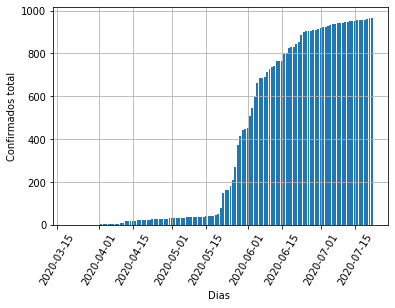

In [68]:
import matplotlib.pyplot as plt
plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,3].values)
plt.xlabel('Dias ')
plt.ylabel('Confirmados total')
plt.xticks(rotation=60)
plt.grid(True)

In [61]:
#import matplotlib.pyplot as plt
#plt.plot(tabela.iloc[:,0].values, tabela.iloc[:,4].values, color = "red")
#plt.xlabel('Dias ')
#plt.ylabel('Óbitos totais')
#plt.xticks(rotation=60)
#plt.grid(True)


Grafico confirmados diarios Micro OP:

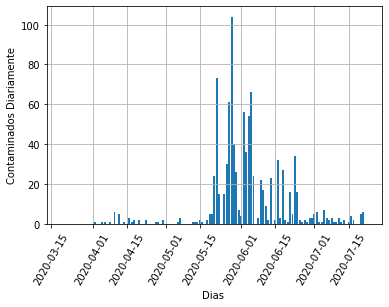

In [69]:
import matplotlib.pyplot as plt
plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,1].values)
plt.xlabel('Dias ')
plt.ylabel('Contaminados Diariamente')
plt.xticks(rotation=60)
plt.grid(True)

Grafico mortes diarias Micro OP:

In [63]:
#import matplotlib.pyplot as plt
#plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,2].values, color = "red")
#plt.xlabel('Dias ')
#plt.ylabel('Óbitos diarios')
#plt.xticks(rotation=60)
#plt.grid(True)

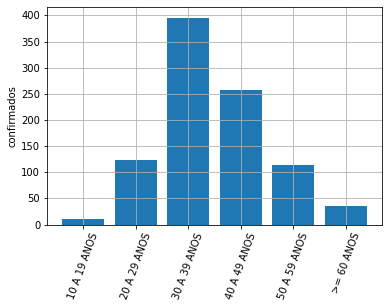

In [70]:
import matplotlib.pyplot as plt
plt.bar(grafico_faixa_etaria.iloc[:,0].values, grafico_faixa_etaria.iloc[:,1].values)
plt.ylabel('confirmados')
plt.xticks(np.arange(0, 6), rotation=70)
plt.grid(True)

In [65]:
#microrregiao_itabira.groupby(['RACA']).contador.sum()

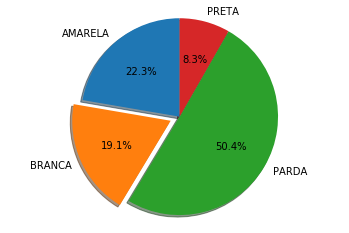

In [66]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AMARELA', 'BRANCA', 'PARDA', 'PRETA'
sizes = raca['Quantidade']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

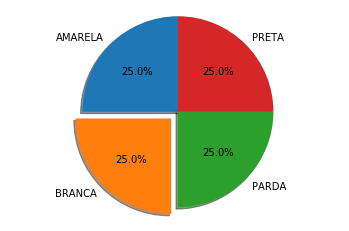

In [67]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AMARELA','BRANCA', 'PARDA', 'PRETA'
sizes = raca_obitos['Quantidade']
explode = (0, 0.1, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

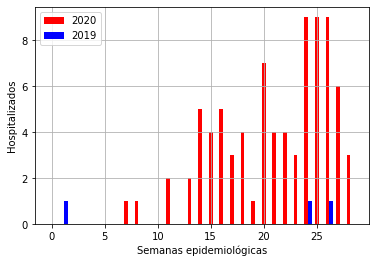

In [86]:
import numpy as np
import matplotlib.pyplot as plt

N = 29
hospitalizados_20 = X_20['Hospitalizados']
width = 0.35

ind = np.arange(N)  # the x locations for the groups

fig, ax = plt.subplots()
rects1 = ax.bar(ind, hospitalizados_20, width, color='r')

hospitalizados_19 = X_19['Hospitalizados']
rects2 = ax.bar(ind + width, hospitalizados_19, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Hospitalizados')
plt.xlabel('Semanas epidemiológicas')
plt.grid(True)

ax.legend((rects1[0], rects2[0]), ('2020', '2019'))

In [65]:
tabela.to_csv("tabela_micro_OP.csv", index = False)